# INPD - Data Analysis, Investigating A Data Set
### This is the final submition for the Udacity - Intro To Programming Course with Data Analysis

The data-set chosen from the given options for this exercise was the __TMdB Movie Database__.

The introductory text that accompanied the data was: 

_This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time._

The Data Analysis Steps, as we have learned, are as follows:
Question | Wrangle | Explore | Draw Conclusions | Communicate

## 1. Questions for the Data Set

The movie data set comes with a number of interesting characteristics that can be looked at to give us insights into the movie bussiness and its trends. Some of the most interesting factors are popularity (knowing how well the movie was perceived by the audience), budget (capital with which to make the movie), revenue (what kind of return the movie made), runtime (length of movie).

From the above what will be explored is:

1. How popularity and runtime change over the years and how they relate to each other?

2. What kinds of properties are associated with movies that have high revenues?

__Setting up our file__

First off we need to bring in any package statements we will be using through out the script. These might start as few as possible but to keep the file clean it is best while importing new packages to always include them at the starting cell.

In [95]:
# Import package statements

import pandas as pd # dataframes
import csv # read and write csv files
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt # plots
import seaborn as sns # visualization library based on matplotlib
# % matplotlib inline

## 2. Data Wrangling

The steps involved in the Data Wrangling phase is 1. Get the Data & 2. Clean the Data.

__Bringing in the Data__

Starting off we import the data in order to see what it contains, how it is formatted as well as evaluate how we will be able to use it.

__Comments on the Data__

In this case our Data is relatively clean with one duplicate record found and deleted.
Our Data contains 10866 rows, 21 columns and lastly null values are present in most columns.

__Actions to be made:__

Clear duplicates.
Remove entries with __imdb_id__ missing.

In [106]:
# Import Data
df = pd.read_csv('tmdb-movies.csv', encoding='ISO-8859-1')
# Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

__2.1 Find And Remove Duplicates__

In [105]:
# Return boolean Series denoting duplicate rows
sum(df.duplicated())

0

In [81]:
# Return DataFrame with duplicate rows removed
df.drop_duplicates(inplace=True)

In [82]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

__2.2 Detect Missing Values in Data Set__

Here we get an understanding of missing/null values within our data set.
From the ones found, the most important missing items are the __imdb_id__ which allow us to identify all unique records. These will be removed in the next step.

In [83]:
# Detect missing values for an array-like object
# Return sum to clearly see nulls per category
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7921
director                  40
tagline                 2817
keywords                1487
overview                   3
runtime                    0
genres                    21
production_companies    1025
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [84]:
# Remove entries with imdb_id missing.
df.dropna(subset=['imdb_id'], inplace=True)
# # Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [85]:
# This function returns the first n rows for the object based on position.
# It is useful for quickly testing if your object has the right type of data in it
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## 3. Explore Data

While exploring the data we are looking to find patterns to help analyze and abstract ideas and relationships with the ambition to get sufficient answers to our questions. These are supplemented by visualizations and graphs which help by giving representations of the data in a more perceivable way.

## 3.1 Data Question 1

How popularity and runtime change over the years and how they relate to each other?

In [107]:
# Group series by release year and get mean values
df.groupby('release_year').mean()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,
1960,15715.281250,0.458932,6.892796e+05,4.531406e+06,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07
1961,18657.000000,0.422827,1.488290e+06,1.089420e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07
1962,17001.062500,0.454783,1.710066e+06,6.736870e+06,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07
1963,16556.000000,0.502706,2.156809e+06,5.511911e+06,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07
1964,17379.571429,0.412428,9.400753e+05,8.118614e+06,109.214286,74.690476,6.211905,6.608980e+06,5.707603e+07
1965,17564.714286,0.342587,2.005860e+06,1.308805e+07,118.171429,52.000000,6.194286,1.388168e+07,9.057670e+07
1966,16514.000000,0.304112,1.251191e+06,1.842102e+06,106.891304,31.739130,6.128261,8.405522e+06,1.237527e+07
1967,17429.700000,0.471154,2.516305e+06,1.844587e+07,104.950000,77.550000,6.242500,1.644849e+07,1.205763e+08
1968,18628.589744,0.484202,1.844590e+06,6.788025e+06,107.282051,108.128205,6.379487,1.156367e+07,4.255388e+07


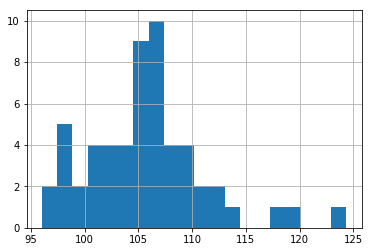

In [115]:
# Group series using mapper or by a series of columns. Get mean and create histogram with runtime values
df.groupby('release_year').mean()['runtime'].hist(bins = 20)

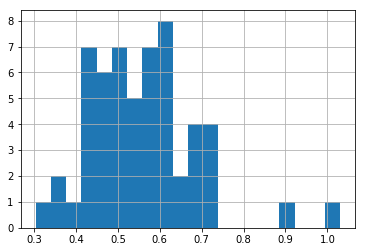

In [116]:
# Group series using mapper or by a series of columns. Get mean and create histogram with popularity values
df.groupby('release_year').mean()['popularity'].hist(bins = 20)

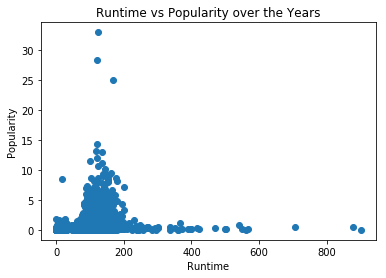

In [109]:
# See how Runtime relates to Popularity over the Years

plt.scatter(x=df_yr['runtime'], y=df_yr['popularity'])
plt.xlabel('Runtime')
plt.ylabel('Popularity')
plt.title('Runtime vs Popularity over the Years');

## 3.2 Question 2

What kinds of properties are associated with movies that have high revenues?

Thinking about this question and its possible answers away from the data we would obviously look at how well the movie was perceived by the audience so its popularity will be an important factor. Another can be vote count.

In [112]:
df.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


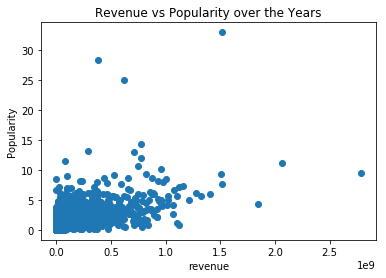

In [113]:
plt.scatter(x=df['revenue'], y=df['popularity'])
plt.xlabel('revenue')
plt.ylabel('Popularity')
plt.title('Revenue vs Popularity over the Years');

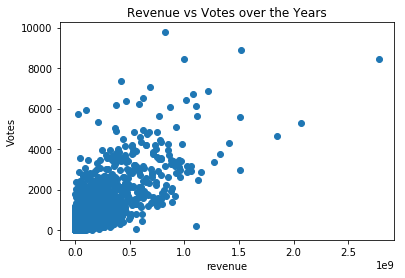

In [114]:
plt.scatter(x=df['revenue'], y=df['vote_count'])
plt.xlabel('revenue')
plt.ylabel('Votes')
plt.title('Revenue vs Votes over the Years');

## 4.0 Conclusions



To conclude the investigation into the movies data set; the findings for both answers are as follows:

__How do popularity and runtime change over the years and how do they relate to each other?__

Runtime change over the years has an interesting peak shown in the histogram hitting around 105 mins for the largest number of movies.

Popularity change over the years show that the audience are harsh critics and from what can be seen most rating fall between 0.4-0.7

When looking at how runtime relates to popularity the scatterplot clearly show the audiences preference when coming to the length of movies. 

__What kinds of properties are associated with movies that have high revenues?__

The properties related to high movie revenues are popularity and vote count.
As seen above in the chart and both scatterplots it is clear that these values have a positive correlation where revenue and popularity and positively related as is revenue and vote counts.